In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

# Read the dataset

In [2]:
# Read in the data
datapath="EDA2_new_CWPS_dataset_k_means.csv"
df=pd.read_csv(datapath)

In [3]:
df

,clusters,organisation_id,Industry,size_range_mean,is_partner_org,total_certified,current_certified,past_certified,days_since_first_status,total_renewals,...,DIRECT_paused,CAP_paused,PARTNER_paused,VSS_paused,DISTRIBUTOR_paused,LEGACY_paused,FIF2_paused,IASME_paused,LTT_paused,LTT2_paused
0,2,9198,OTHE,5.196152,0,2.236068,1.732051,1.414214,28.460499,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,27802,OTHE,13.228757,0,1.000000,1.000000,0.000000,11.224972,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,27696,LEGA,2.645751,0,1.000000,1.000000,0.000000,11.916375,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,27874,CONS,5.196152,0,1.000000,1.000000,0.000000,10.583005,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,27107,FINA,1.732051,0,1.414214,1.414214,0.000000,11.445523,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,5,15303,CONU,5.196152,0,1.414214,1.000000,1.000000,23.021729,0.0,...,0,0,0,0,0,0,0,0,0,0
531,2,8983,ITEC,19.364917,0,2.236068,1.732051,1.414214,28.618176,1.0,...,0,0,0,0,0,0,0,0,0,0
532,2,9071,ITEC,5.196152,0,2.236068,1.414214,1.732051,20.445048,0.0,...,0,0,0,0,0,0,0,0,0,0
533,2,9298,ITEC,13.228757,0,2.449490,2.000000,1.414214,28.266588,1.0,...,0,0,0,0,0,0,0,0,0,0


# 标记

In [4]:
# count the distinct values of each column
count = df.nunique()
print(count.to_string())

clusters                           6
organisation_id                  535
Industry                          31
size_range_mean                   10
is_partner_org                     2
total_certified                    9
current_certified                  5
past_certified                     7
days_since_first_status          282
total_renewals                     3
all_mean_period_months             7
active_mean_period_months          7
days_since_first_certified       120
incomplete_certifs                10
mean_days_to_certified           164
days_since_last_certified        136
most_recent_incomplete_status    114
current_CE                         3
current_CEP                        3
current_COMPLETE                   1
current_GDPR                       3
past_CE                            5
past_CEP                           4
past_GDPR                          3
DIRECT_active                      5
CAP_active                         4
PARTNER_active                     4
V

In [5]:
df_EDA_clusters=df[['clusters','Industry','size_range_mean','is_partner_org','total_certified','current_certified','past_certified','days_since_first_status','total_renewals']]
df_cluster_features=df[['Industry','size_range_mean','is_partner_org','total_certified','current_certified','past_certified','days_since_first_status','total_renewals']]

# Relationship bewteen different features and clusters

In [6]:
df_segm_analysis = df_EDA_clusters.groupby(['clusters']).mean()
df_segm_analysis =df_segm_analysis.reset_index()
df_segm_analysis

,clusters,size_range_mean,is_partner_org,total_certified,current_certified,past_certified,days_since_first_status,total_renewals
0,0,6.783028,0.225806,1.565863,1.263442,0.767843,22.880449,0.161290
1,1,5.236840,0.040609,1.159309,1.159309,0.000000,10.676597,0.005076
2,2,6.543177,0.058824,1.872670,1.441757,1.152646,27.112560,0.235294
3,3,5.520865,0.115385,1.405545,1.366880,0.100137,17.894925,0.163462
4,4,4.244534,0.200000,2.073776,1.403367,1.445077,36.196446,0.308737
5,5,4.150171,0.140000,1.521232,1.384809,0.344853,19.746640,0.268284


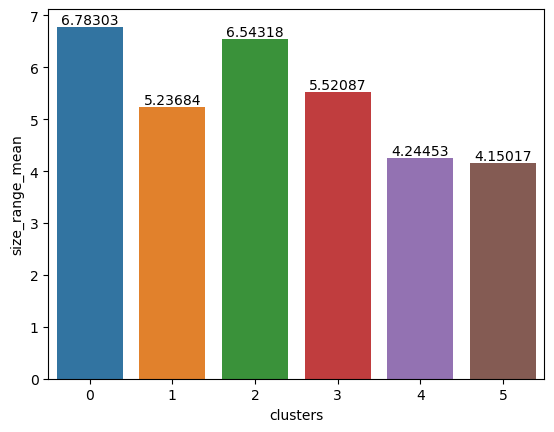

In [7]:
ax=sns.barplot(x='clusters', y='size_range_mean',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

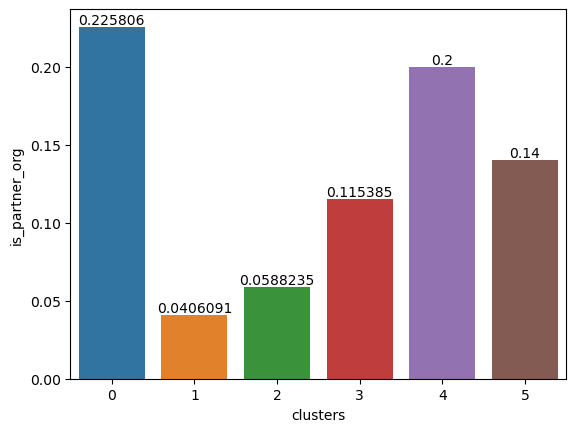

In [8]:
ax=sns.barplot(x='clusters', y='is_partner_org',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

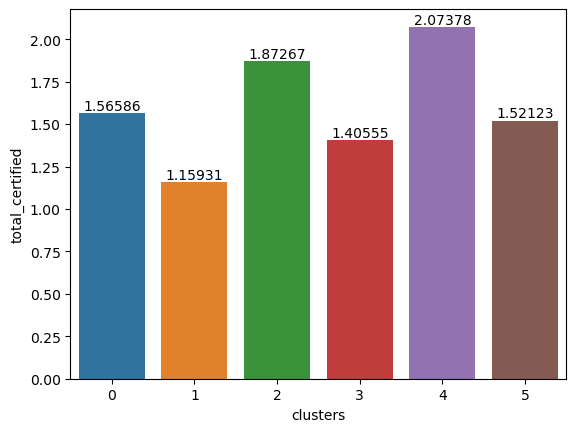

In [9]:
ax=sns.barplot(x='clusters', y='total_certified',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

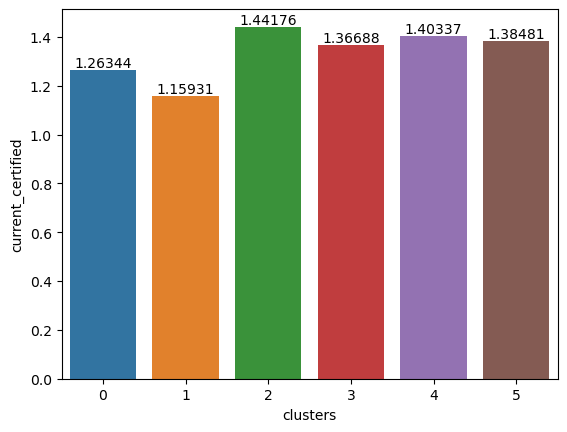

In [10]:
ax=sns.barplot(x='clusters', y='current_certified',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

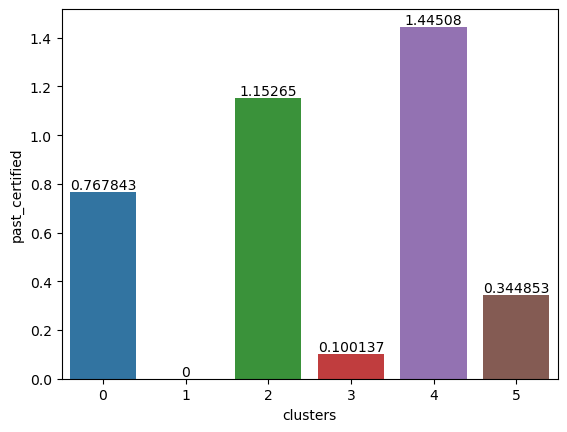

In [11]:
ax=sns.barplot(x='clusters', y='past_certified',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

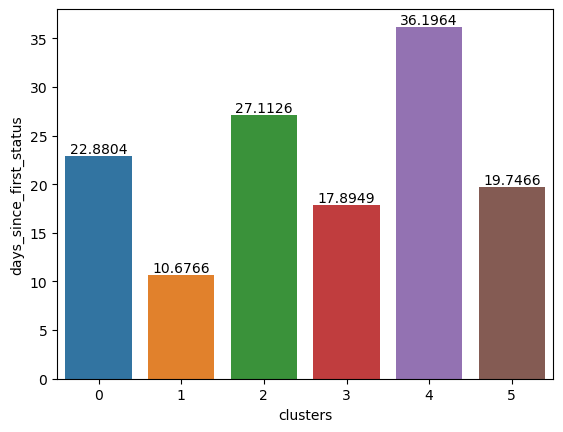

In [12]:
ax=sns.barplot(x='clusters', y='days_since_first_status',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

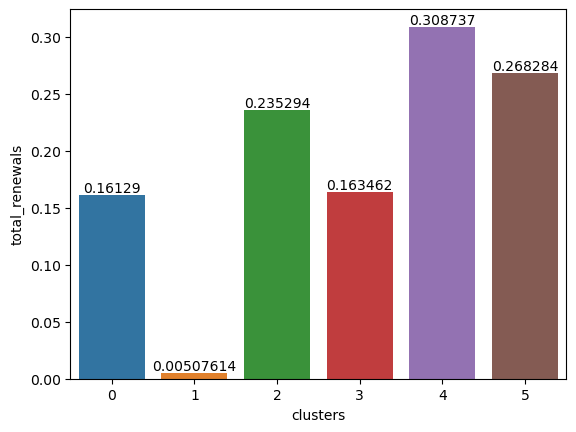

In [13]:
ax=sns.barplot(x='clusters', y='total_renewals',data=df_segm_analysis)

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

In [14]:
# count the distinct values of each column
count = df_EDA_clusters.nunique()
print(count.to_string())

clusters                     6
Industry                    31
size_range_mean             10
is_partner_org               2
total_certified              9
current_certified            5
past_certified               7
days_since_first_status    282
total_renewals               3


# Industry and days_since_first_status

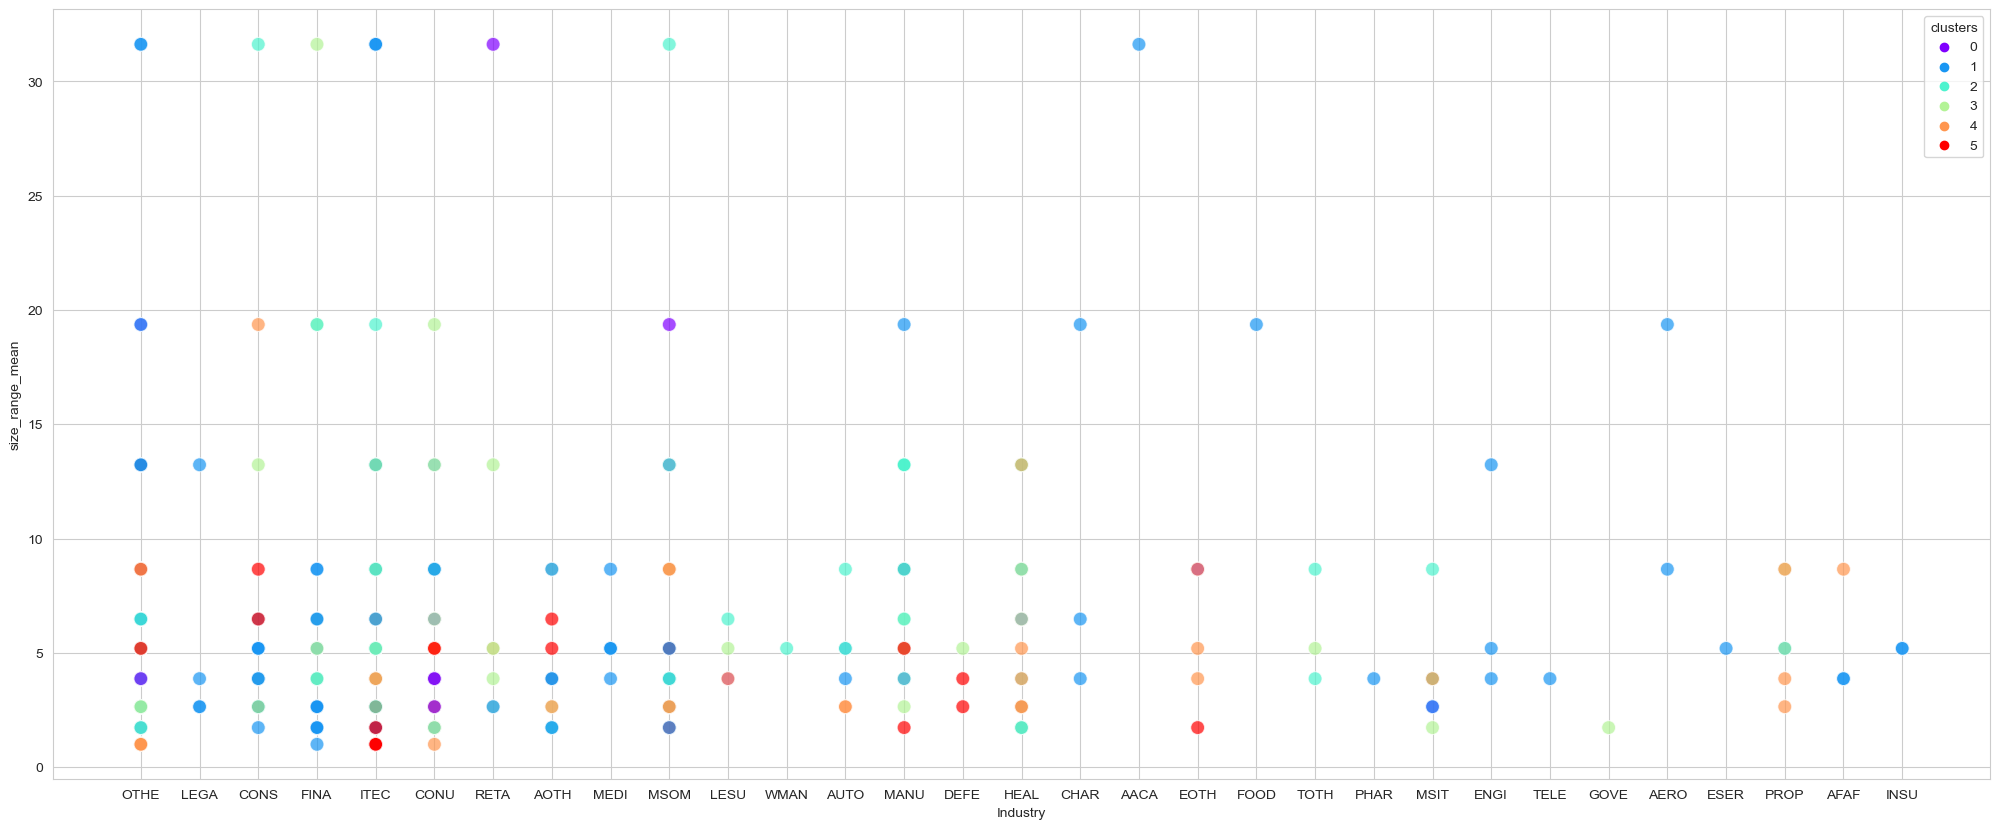

In [15]:
import seaborn as sns

# 生成示例数据
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(25, 10))

# 绘制散点图
sns.set_style('whitegrid')
sns.scatterplot(data=df_EDA_clusters, x='Industry', y='size_range_mean', hue='clusters',palette='rainbow', alpha=0.7, s=100)

# 将industry按数值分类
industries = sorted(df_EDA_clusters['Industry'].unique())
n_industries = len(industries)
df['industry_cat']= pd.Categorical(df_EDA_clusters['Industry'], categories=industries, ordered=True)

plt.show()


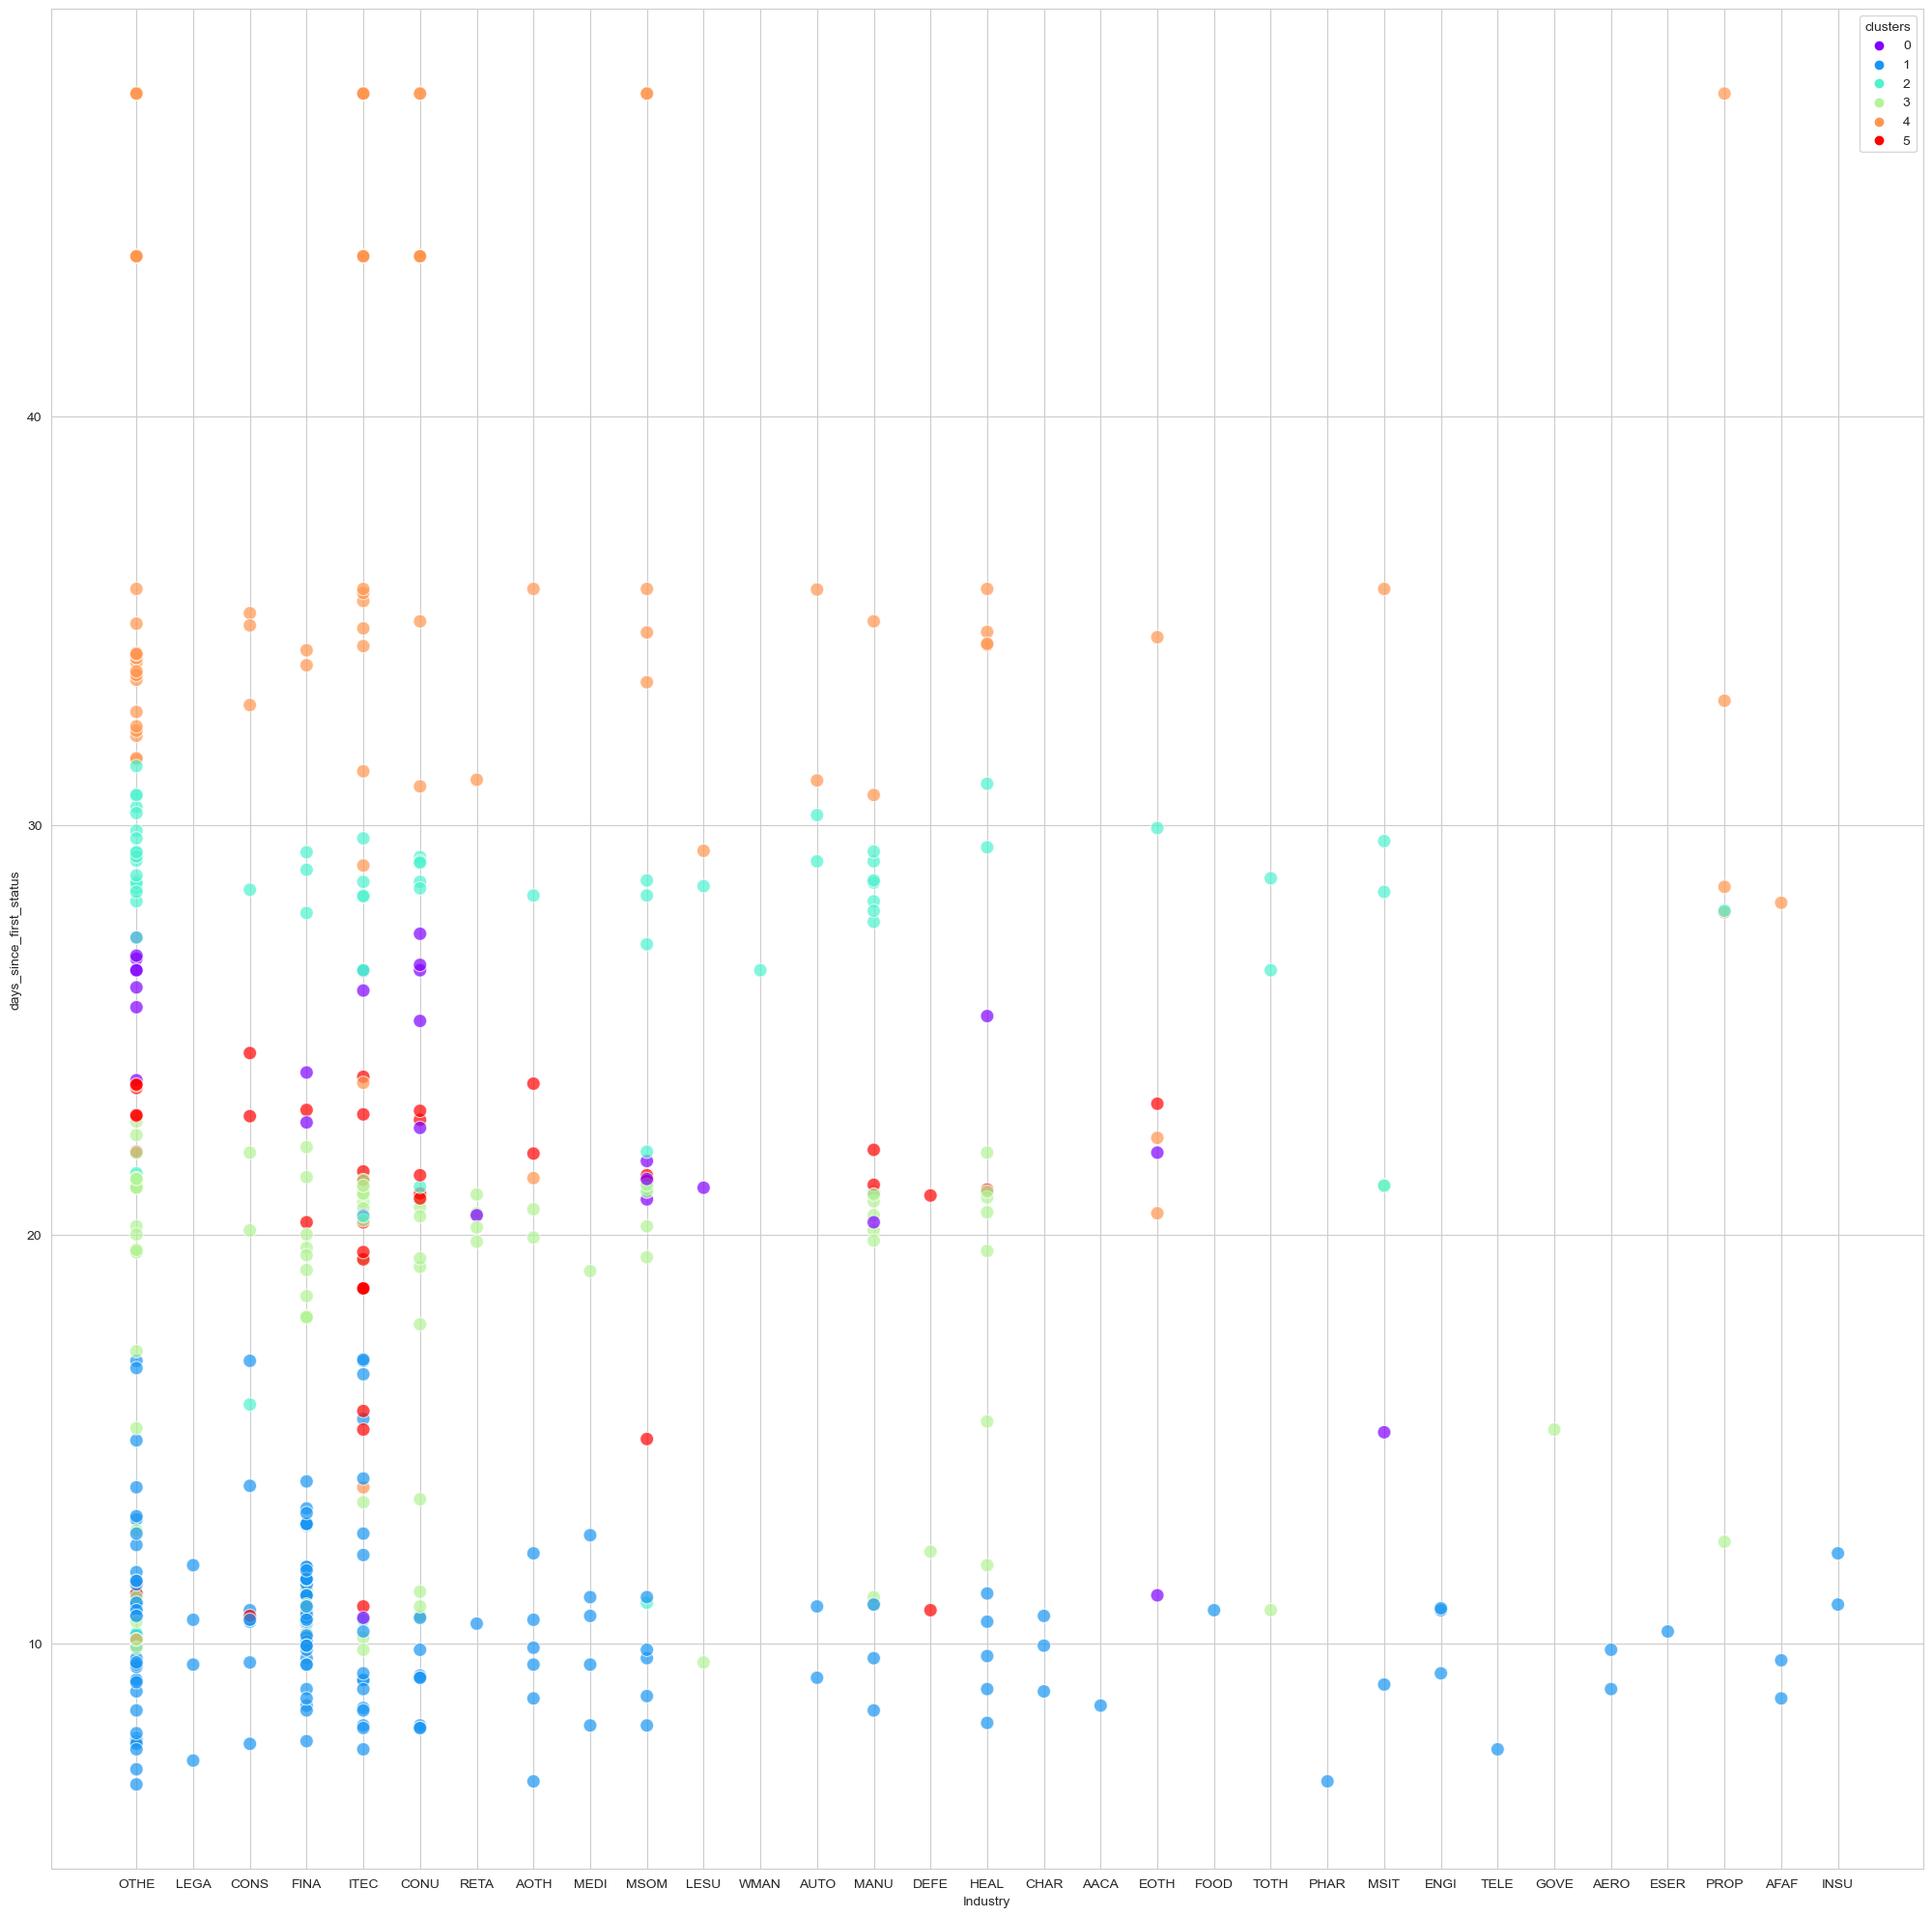

In [16]:
import seaborn as sns

# 生成示例数据
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(25, 25))

# 绘制散点图
sns.set_style('whitegrid')
sns.scatterplot(data=df_EDA_clusters, x='Industry', y='days_since_first_status', hue='clusters',palette='rainbow', alpha=0.7, s=100)

# 将industry按数值分类
industries = sorted(df_EDA_clusters['Industry'].unique())
n_industries = len(industries)
df['industry_cat']= pd.Categorical(df_EDA_clusters['Industry'], categories=industries, ordered=True)

plt.show()


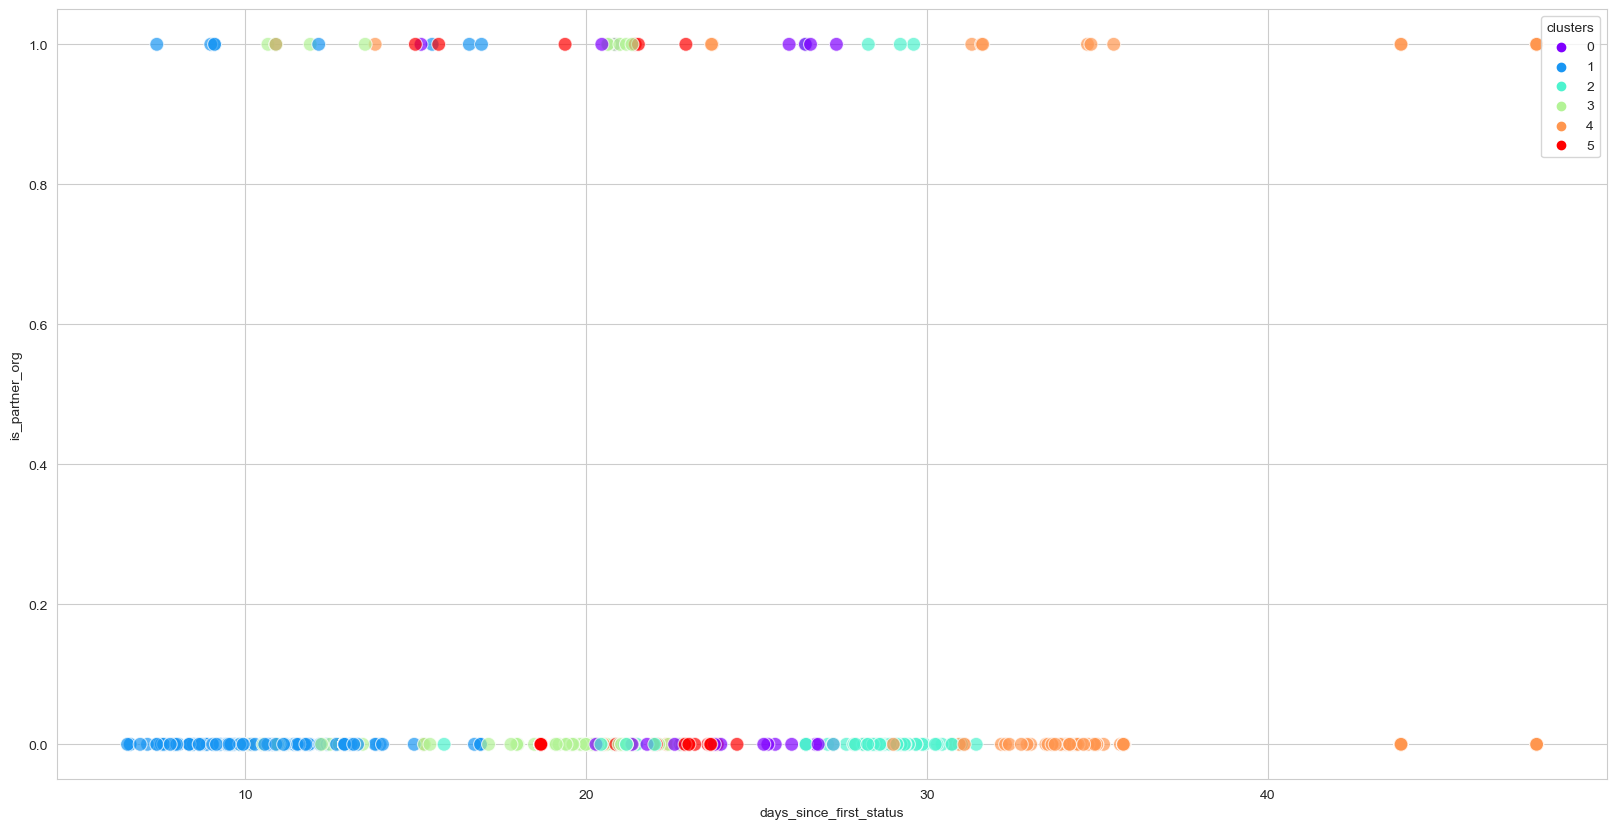

In [44]:
import seaborn as sns

# 生成示例数据
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(20, 10))

# 绘制散点图
sns.set_style('whitegrid')
sns.scatterplot(data=df_EDA_clusters, y='is_partner_org', x='days_since_first_status', hue='clusters',palette='rainbow', alpha=0.7, s=100)

# 将industry按数值分类
industries = sorted(df_EDA_clusters['Industry'].unique())
n_industries = len(industries)
df['industry_cat']= pd.Categorical(df_EDA_clusters['Industry'], categories=industries, ordered=True)

plt.show()

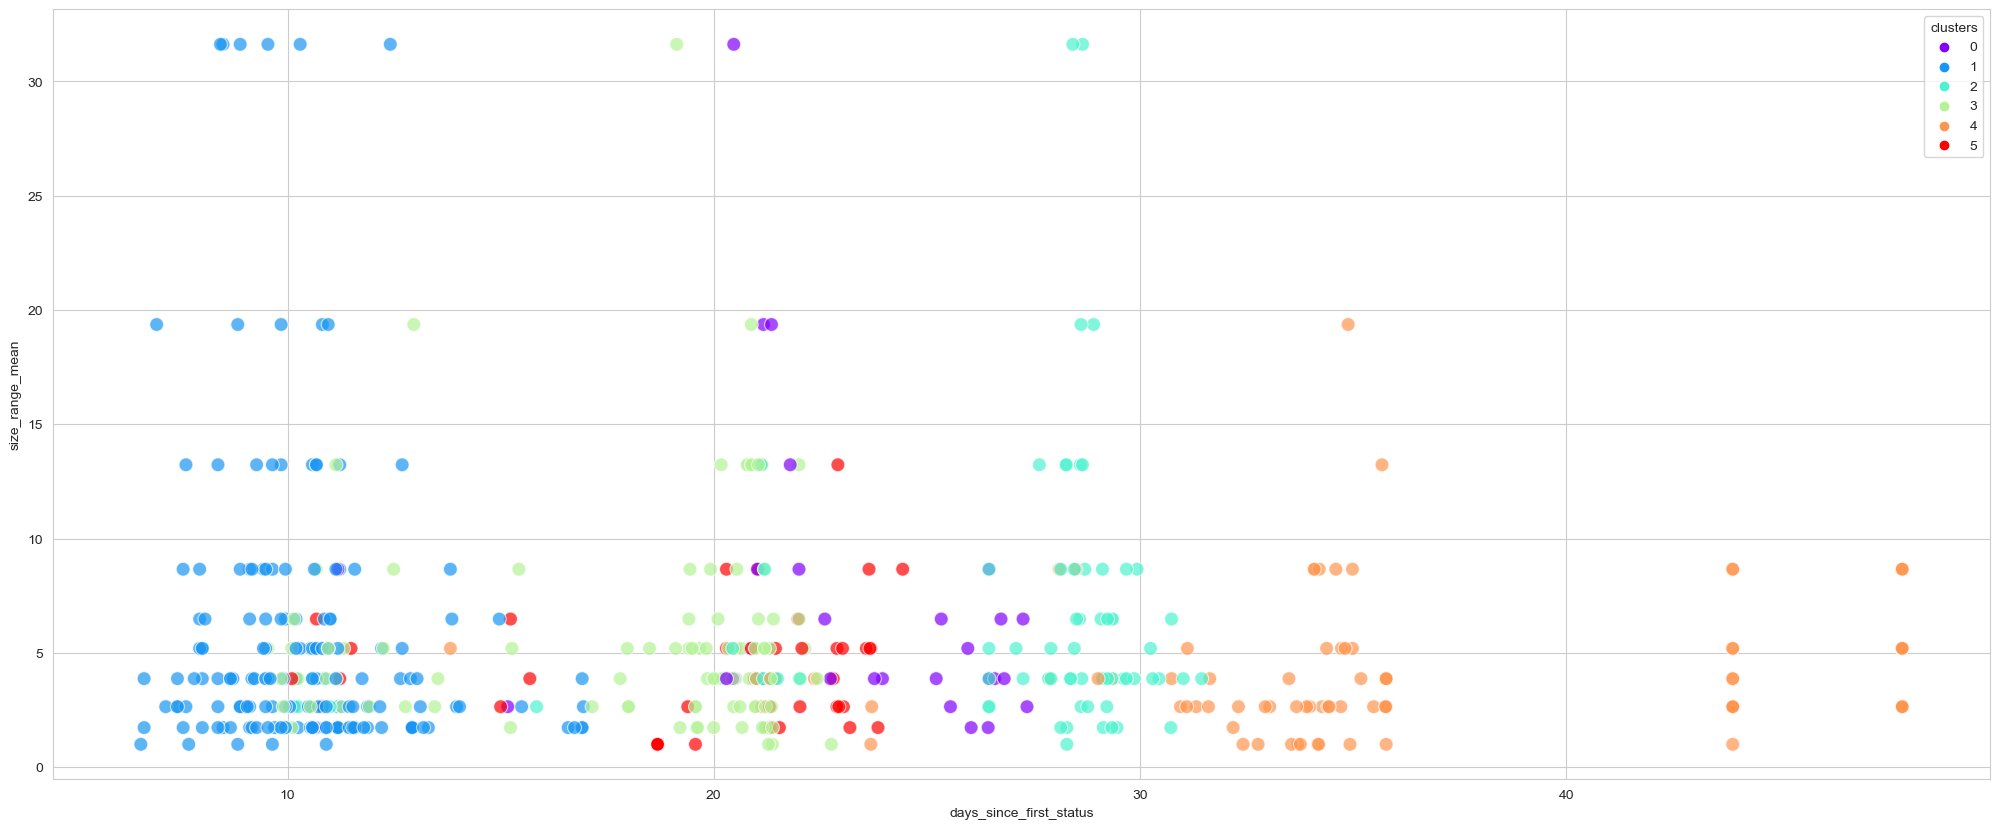

In [17]:
import seaborn as sns

# 生成示例数据
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(25, 10))

# 绘制散点图
sns.set_style('whitegrid')
sns.scatterplot(data=df_EDA_clusters, x='days_since_first_status', y='size_range_mean', hue='clusters',palette='rainbow', alpha=0.7, s=100)


plt.show()


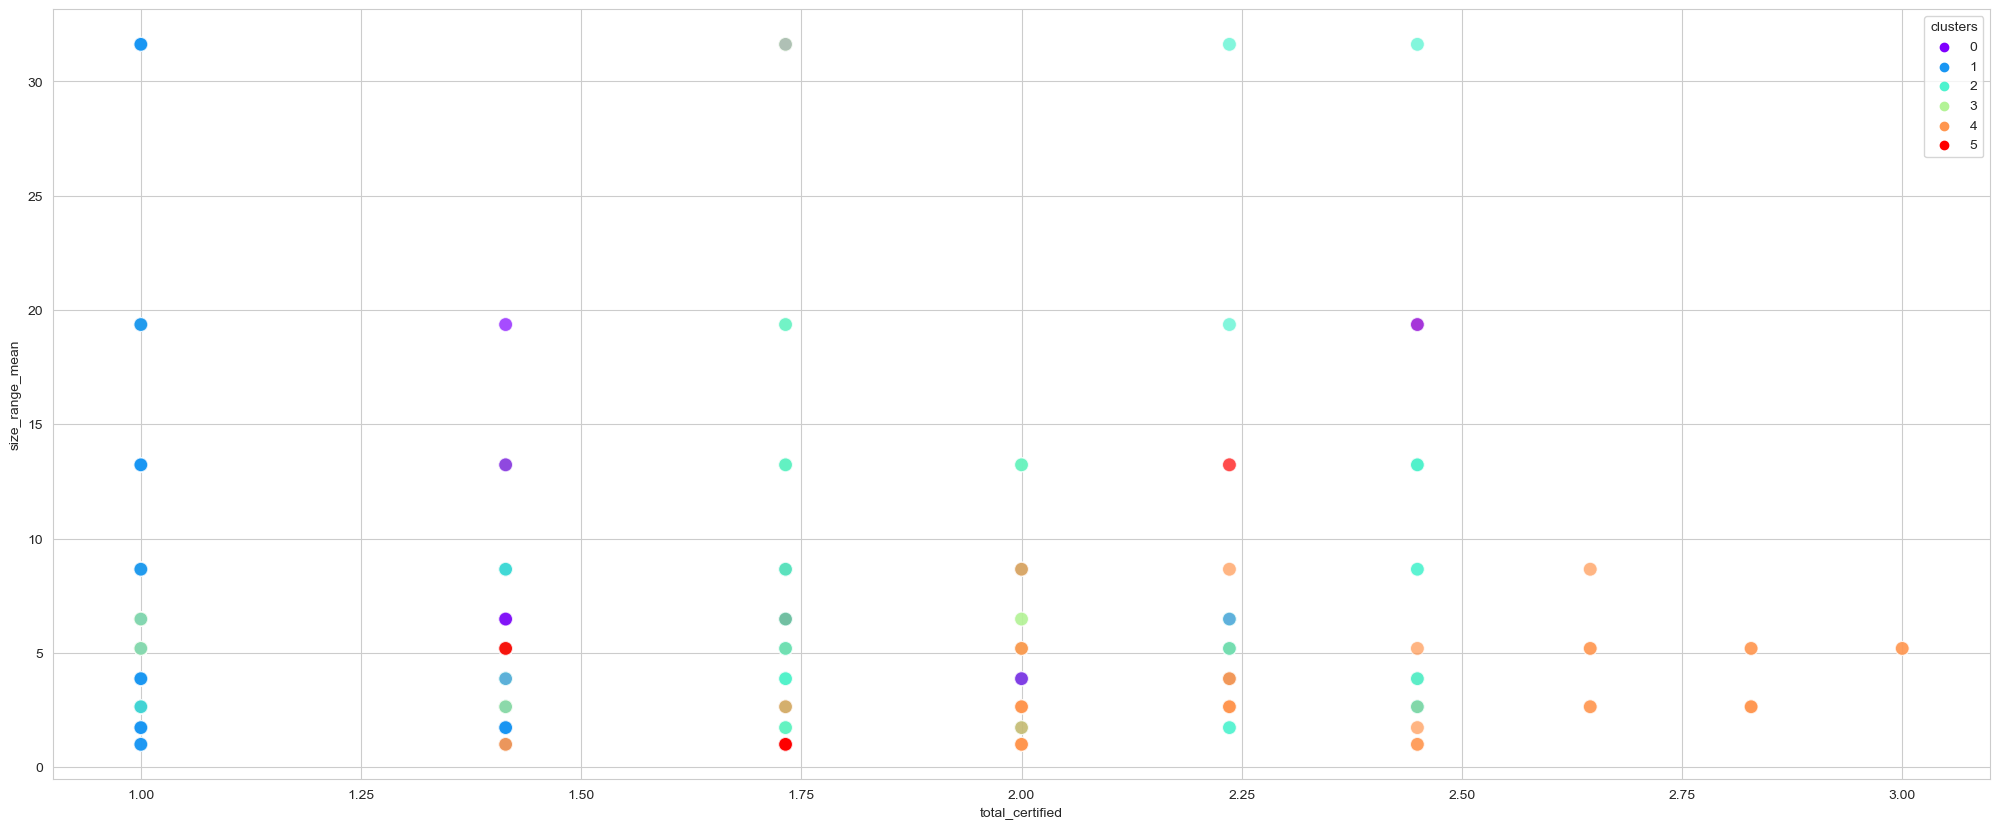

In [18]:
import seaborn as sns

# 生成示例数据
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(25, 10))

# 绘制散点图
sns.set_style('whitegrid')
sns.scatterplot(data=df_EDA_clusters, x='total_certified', y='size_range_mean', hue='clusters',palette='rainbow', alpha=0.7, s=100)


plt.show()


# 相关性

In [19]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [20]:
categorical_features=identify_nominal_columns(df_cluster_features)
categorical_features

['Industry']

In [21]:
df_correlation=df_cluster_features

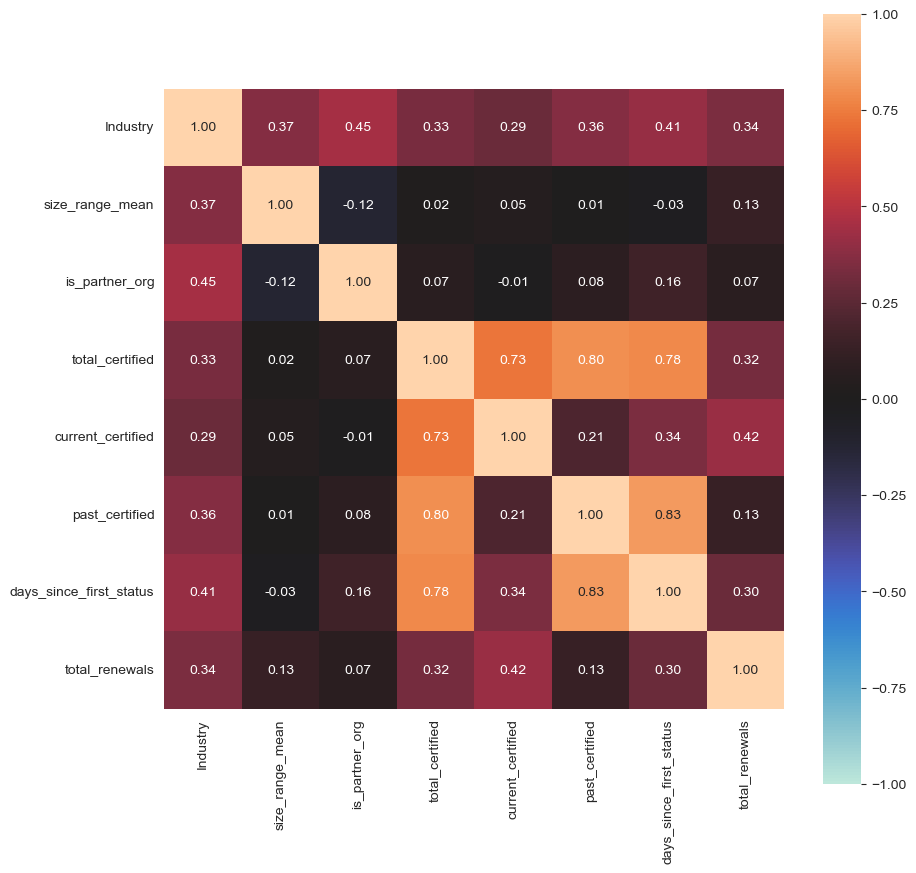

In [22]:
complete_correlation= associations(df_correlation, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']




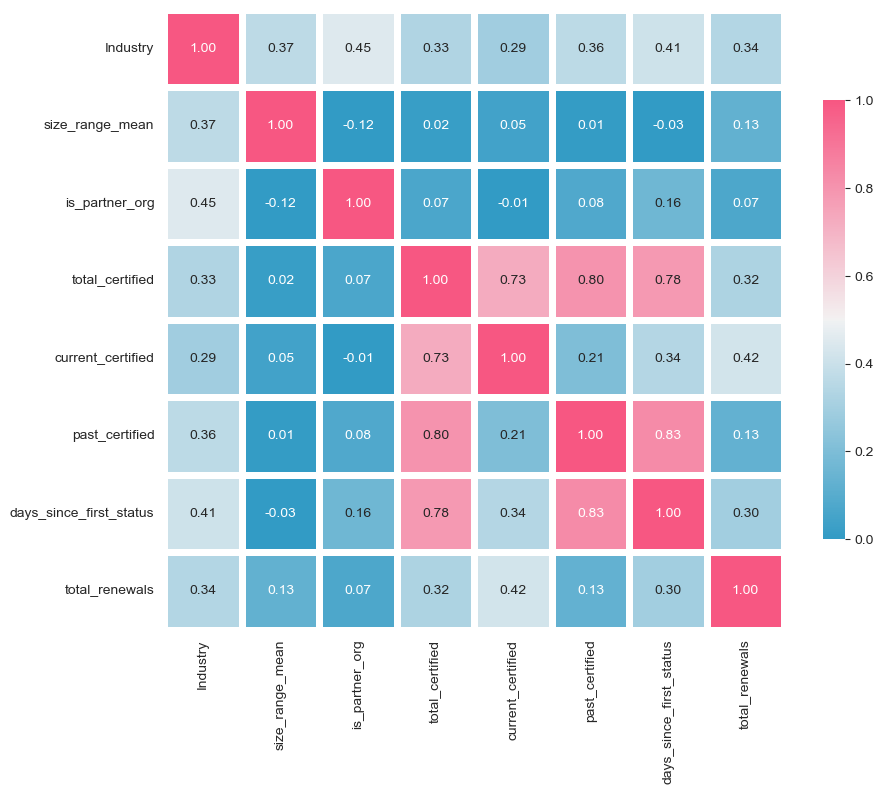

In [23]:
# 使用Seaborn库绘制相关性图
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 0, 90, 60, as_cmap=True)
sns.heatmap(df_complete_corr, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=0, vmax=1, 
           cbar_kws={"shrink": .57}, square=True)

# 显示图像
plt.show()

In [24]:
# count the distinct values of each column
count = df_EDA_clusters.nunique()
print(count.to_string())

clusters                     6
Industry                    31
size_range_mean             10
is_partner_org               2
total_certified              9
current_certified            5
past_certified               7
days_since_first_status    282
total_renewals               3


#Convert the dataframe to a matrix
sns.jointplot(data=df_EDA_clusters, x="Industry", y="size_range_mean", hue="clusters")

# EDA-cluster

## Industry and cluster

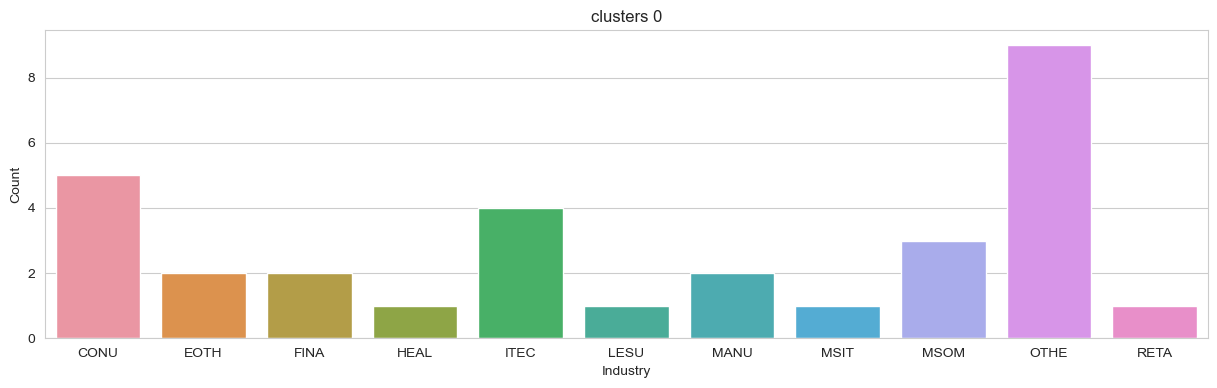

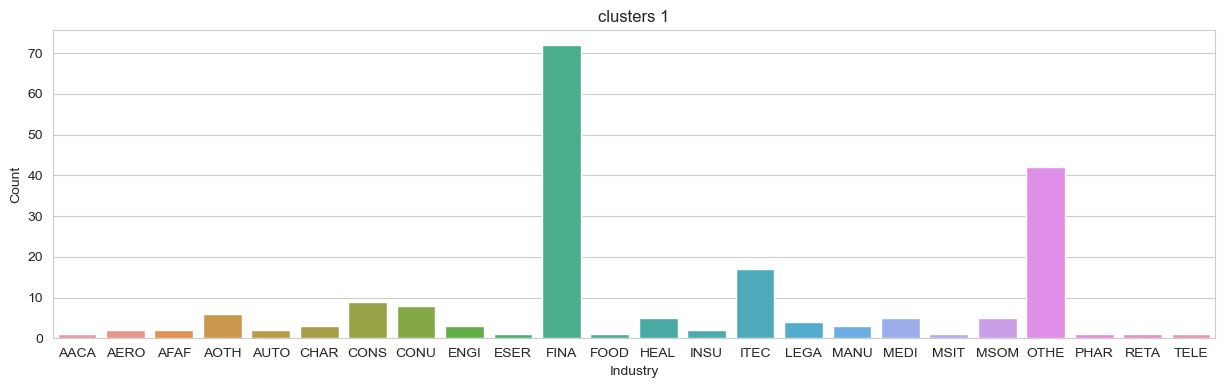

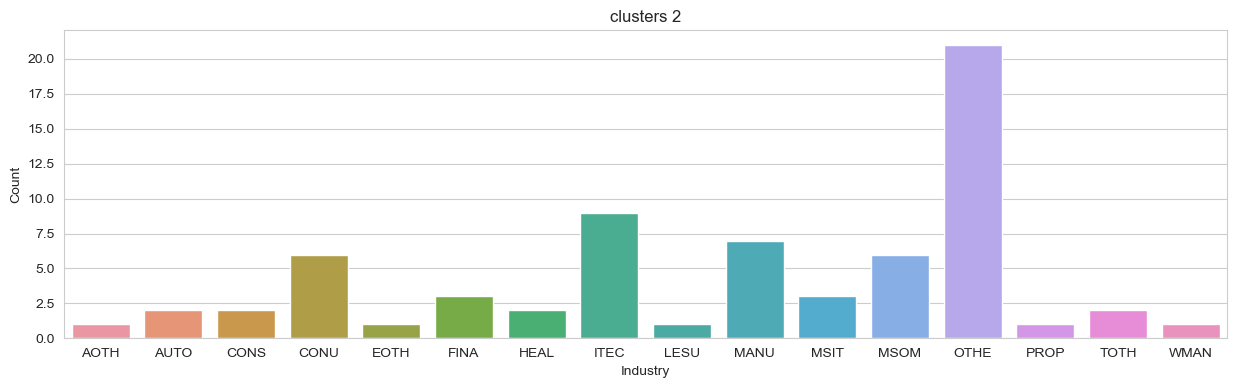

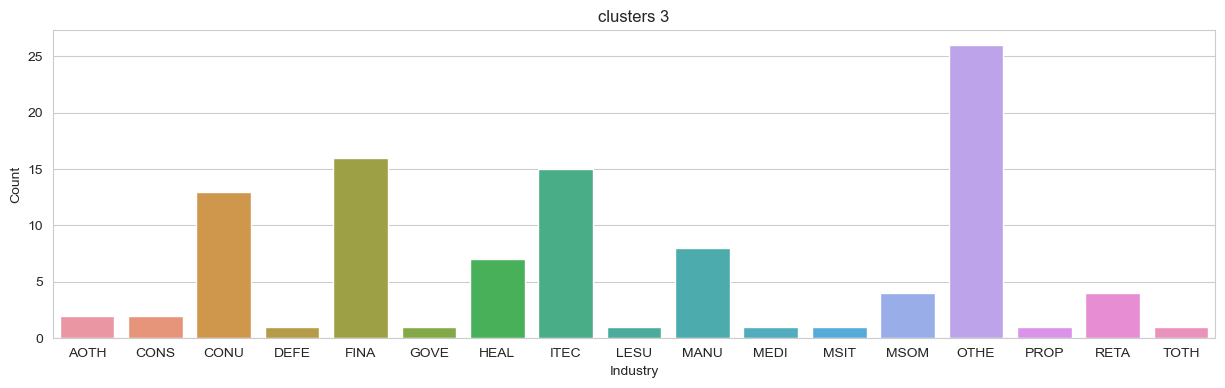

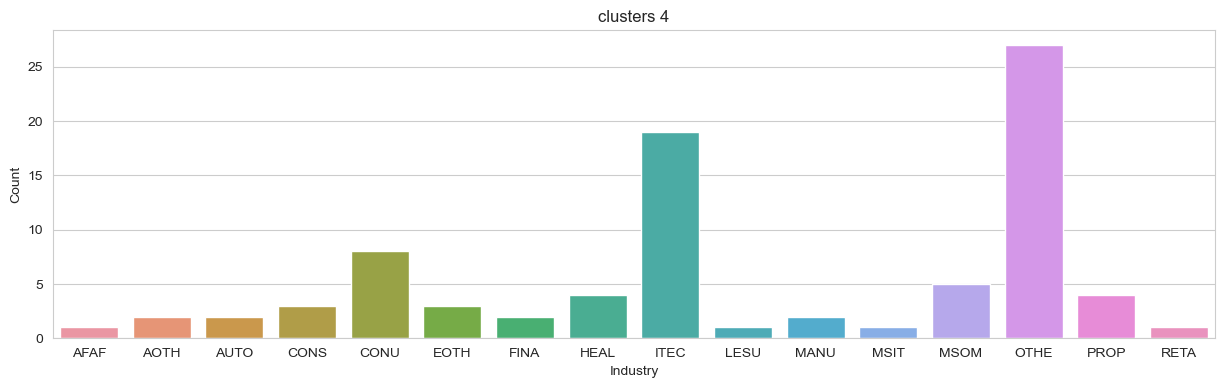

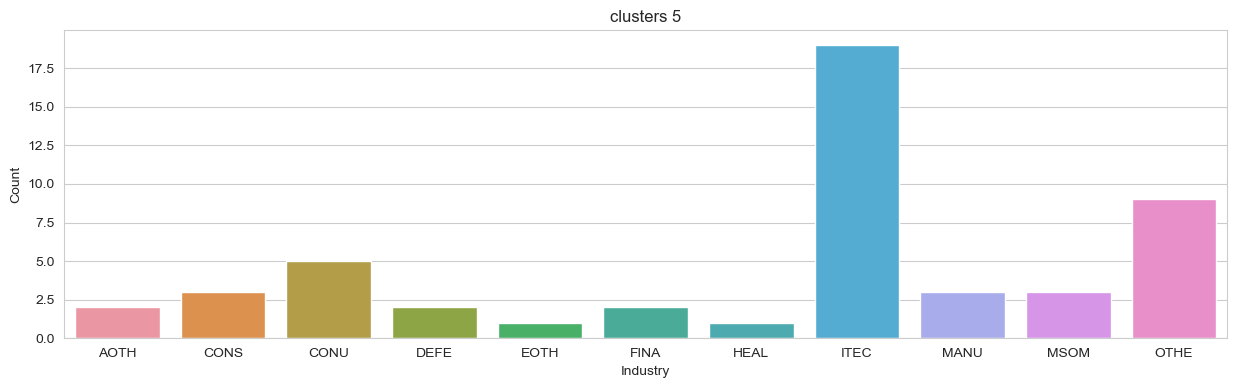

In [25]:
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df.groupby(['clusters', 'Industry']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(15,4))
    sns.barplot(x='Industry', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('Industry')
    plt.ylabel('Count')


##  size_range_mean and clusters

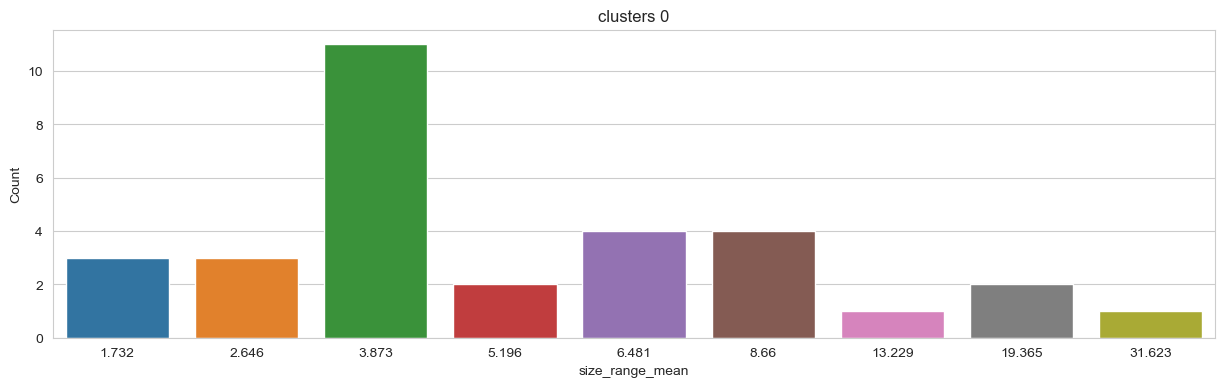

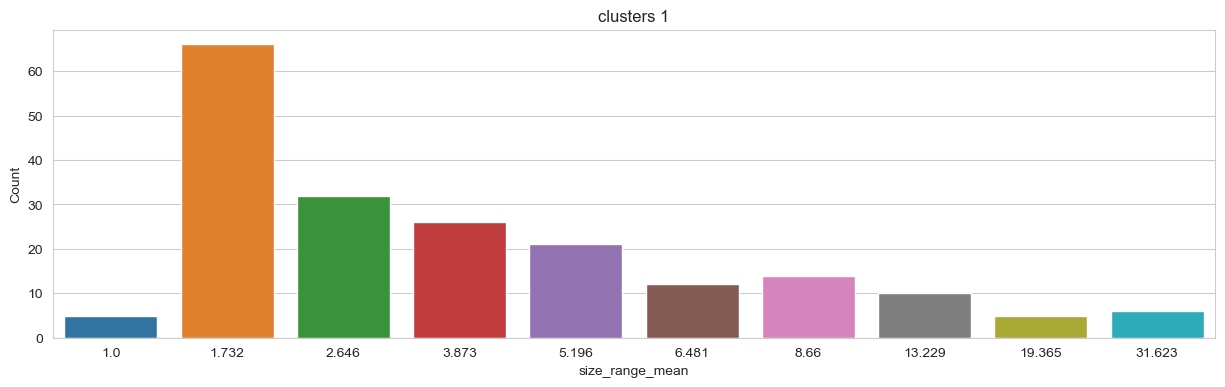

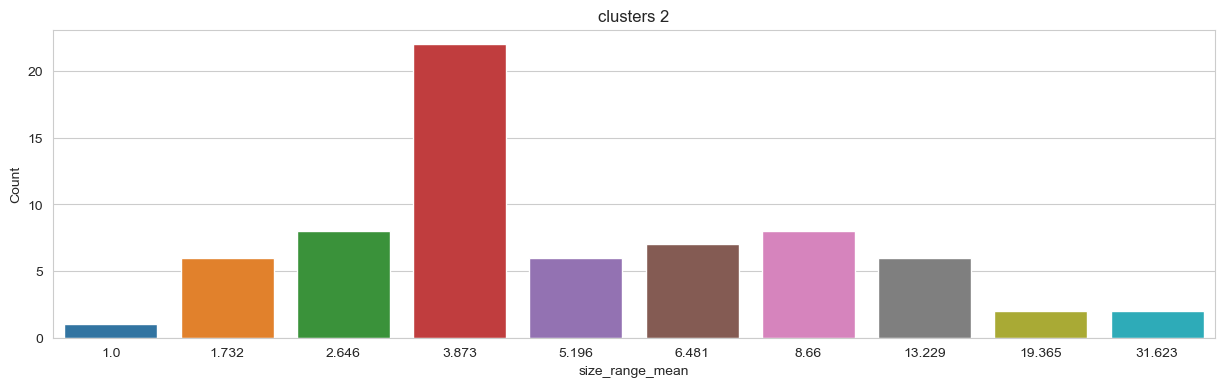

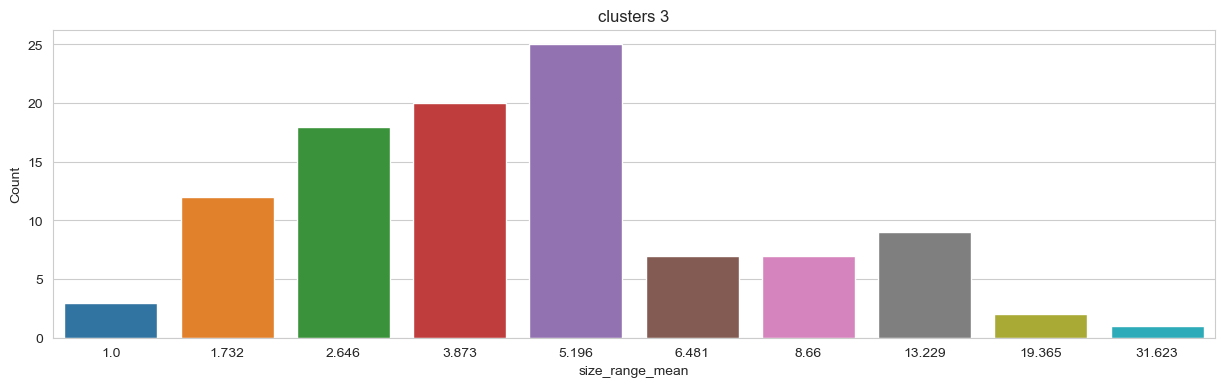

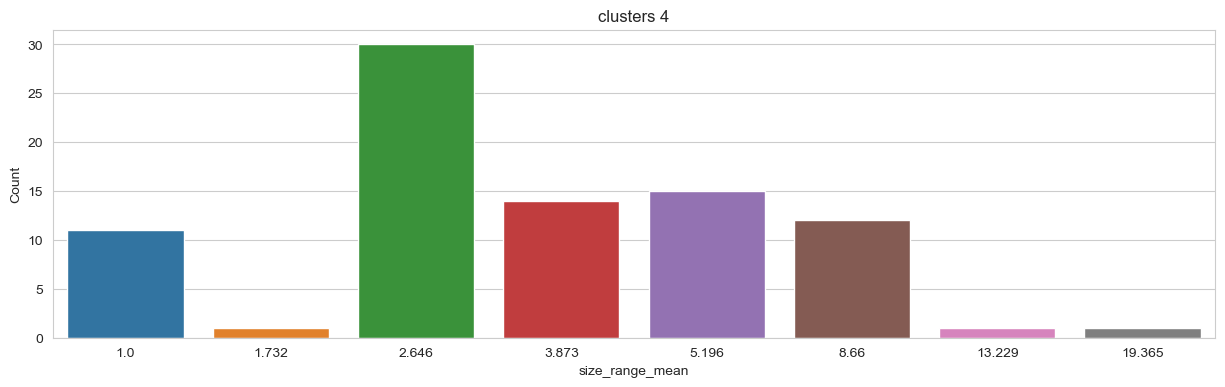

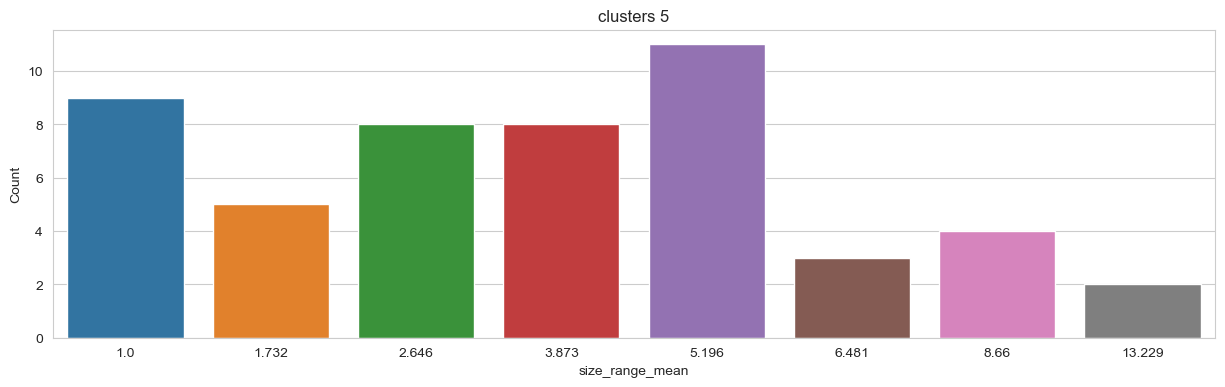

In [26]:
df_rounded = df.round(3)
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df_rounded.groupby(['clusters', 'size_range_mean']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(15,4))
    sns.barplot(x='size_range_mean', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('size_range_mean')
    plt.ylabel('Count')


## is_partner_org and clusters

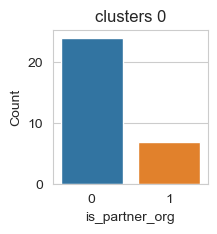

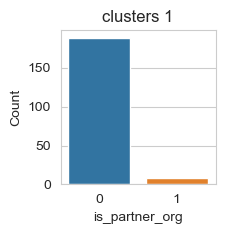

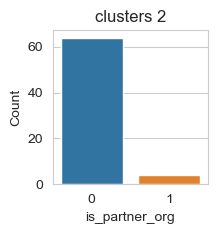

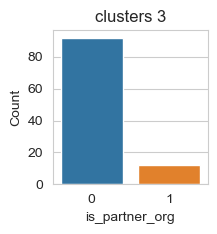

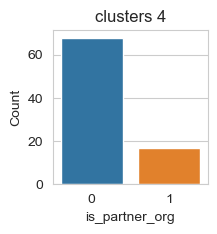

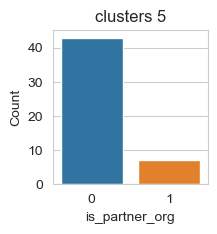

In [32]:
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df.groupby(['clusters', 'is_partner_org']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(2,2))
    sns.barplot(x='is_partner_org', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('is_partner_org')
    plt.ylabel('Count')


## total_certified  and clusters

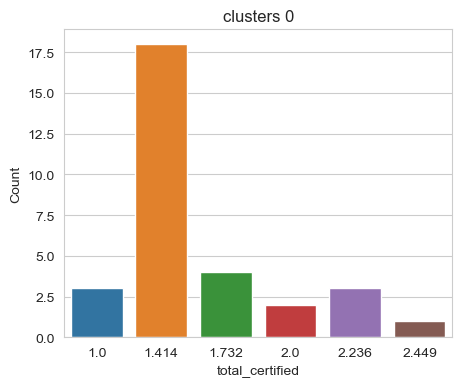

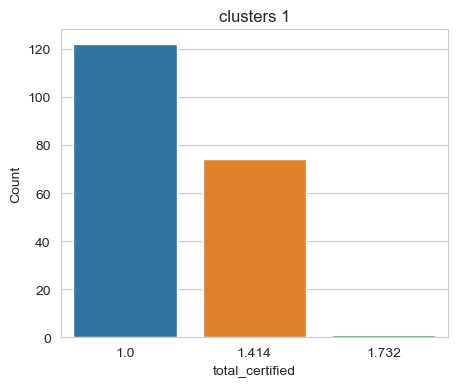

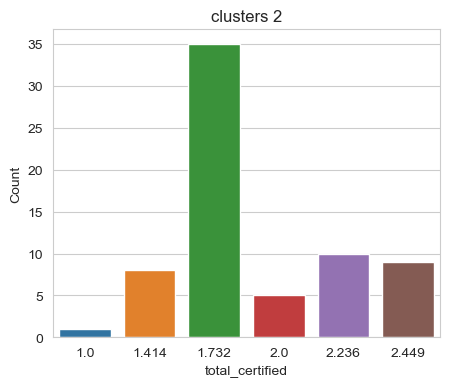

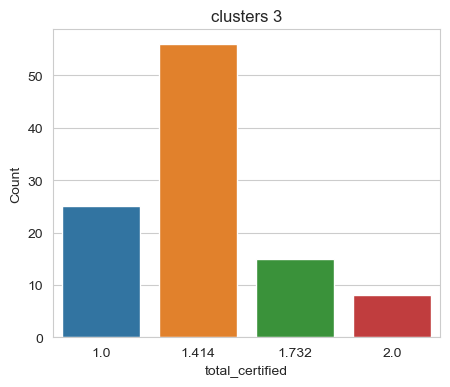

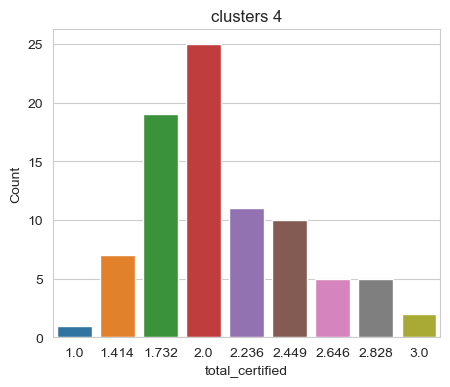

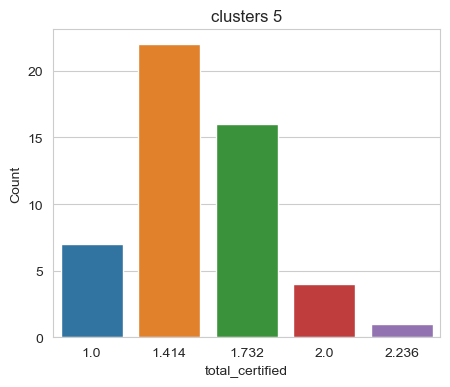

In [28]:
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df_rounded.groupby(['clusters', 'total_certified']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(5,4))
    sns.barplot(x='total_certified', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('total_certified')
    plt.ylabel('Count')


## current_certified and clusters

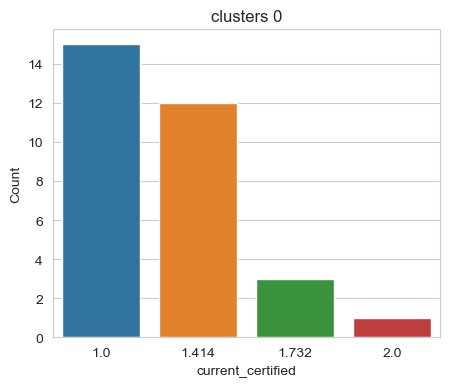

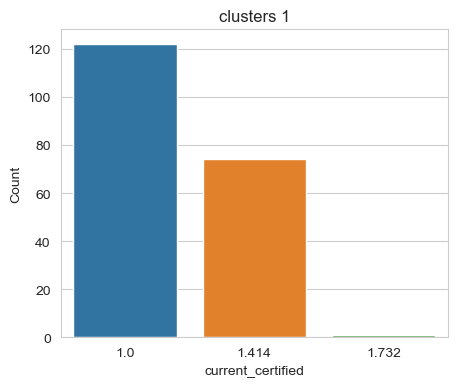

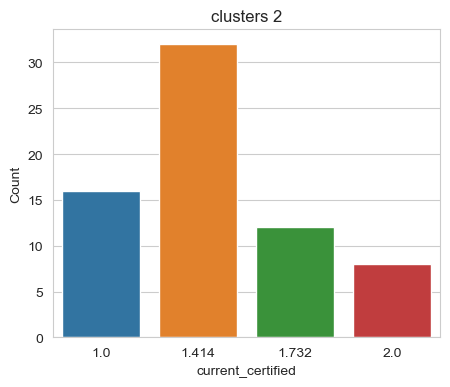

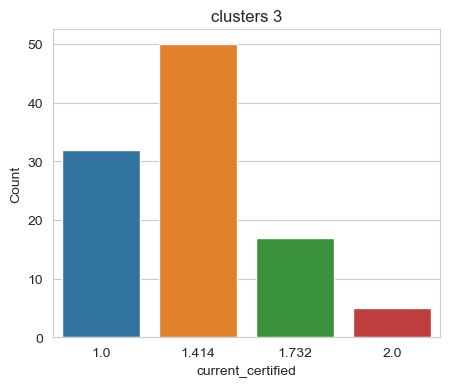

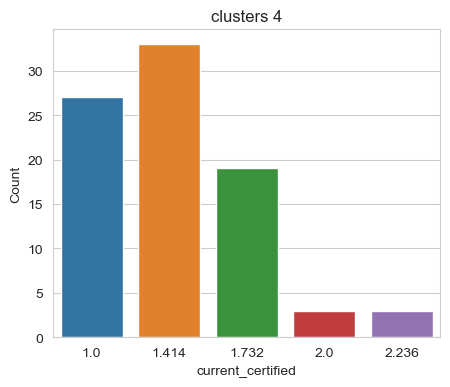

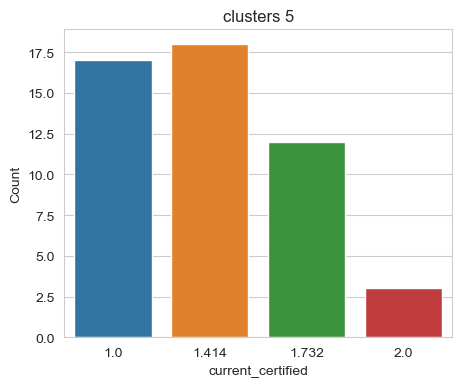

In [29]:
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df_rounded.groupby(['clusters', 'current_certified']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(5,4))
    sns.barplot(x='current_certified', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('current_certified')
    plt.ylabel('Count')


## past_certified and clusters

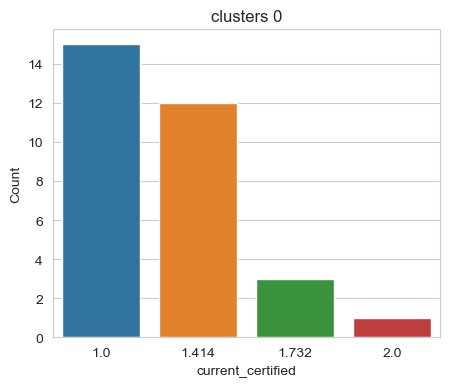

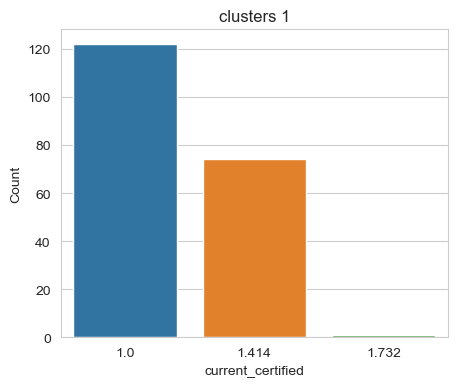

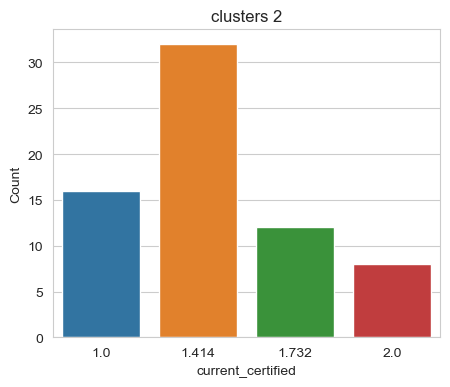

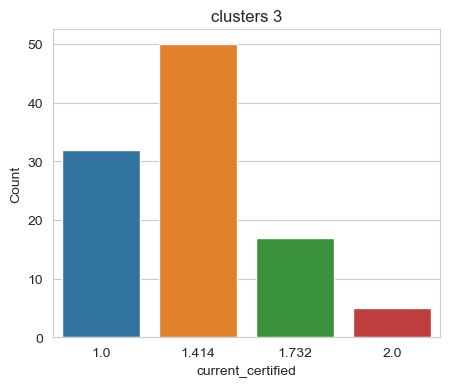

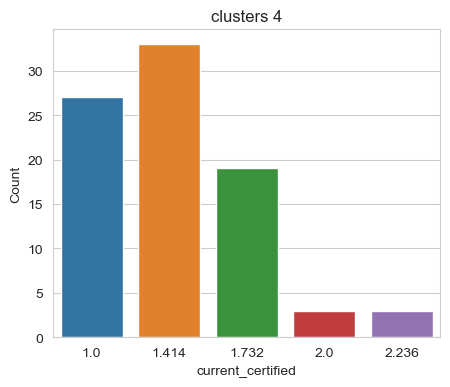

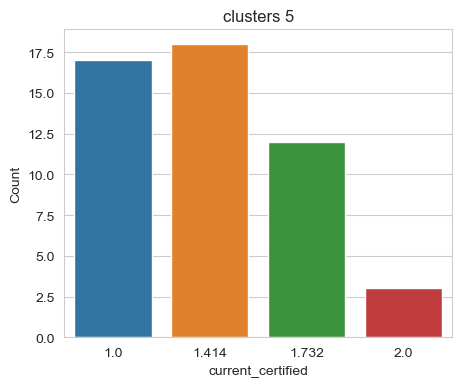

In [30]:
# Add the cluster labels to the dataframe
cluster_labels=df['clusters'] 

# Group the dataframe by the 'Cluster' column and the 'Industry' column
grouped = df_rounded.groupby(['clusters', 'current_certified']).size().reset_index(name='Count')
# Draw a histogram for each cluster
for i in range(6):
    cluster_data = grouped[grouped['clusters'] == i]
    plt.figure(figsize=(5,4))
    sns.barplot(x='current_certified', y='Count', data=cluster_data)
    plt.title('clusters {}'.format(i))
    plt.xlabel('current_certified')
    plt.ylabel('Count')
